In [21]:
# clone the git repo
!git clone https://github.com/Nikhil29/Hackathon.git
%cd Hackathon
!git pull origin master
%cd ..

fatal: destination path 'Hackathon' already exists and is not an empty directory.
/content/Hackathon
From https://github.com/Nikhil29/Hackathon
 * branch            master     -> FETCH_HEAD
Already up to date.
/content


In [0]:
# set the folder to use the ython files etc.
import sys
sys.path.append('/content/Hackathon')

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [37]:
# Load the Red Wines dataset
path = '/content/Hackathon/data/01.xlsx';
data = pd.read_excel(path)

# Display the first five records
display(data.head(n=5))

,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Trading Currency,Day High,Day Low,Closing Price,Volume,Turnover,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**
0,57003,UB#HSI RC2010B,2019-01-31,380000,0.265,-80000,-0.275,2290000,1.15,200000000,HKD,0.265,0.265,0.270,460000,122700,UB,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,24038.0,24138.0,12000,-
1,57014,UB#TENCTRC1903U,2019-01-31,0,0.000,0,0.000,10000,0.03,40000000,HKD,0.000,0.000,0.920,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00
2,57015,JP#TENCTRC1902A,2019-01-31,0,0.000,0,0.000,1000,0.00,50000000,HKD,0.000,0.000,0.960,0,0,JP,700,Bull,Standard,R,2018-11-06,2019-02-14 00:00:00,2019-02-15,N,HKD,252.4,255.2,100,2019-02-18 00:00:00
3,57016,JP#HSI RC2009V,2019-01-31,150000,0.290,0,0.000,100000,0.05,200000000,HKD,0.295,0.280,0.295,150000,43500,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-09-29,N,-,24458.0,24558.0,10000,-
4,57017,JP#HSI RC2010E,2019-01-31,0,0.000,0,0.000,3290000,1.65,200000000,HKD,0.000,0.000,0.390,0,0,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,23358.0,23458.0,10000,-


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64723 entries, 0 to 64722
Data columns (total 30 columns):
CBBC Code                            64723 non-null int64
CBBC Name                            64723 non-null object
Trade Date                           64723 non-null datetime64[ns]
No. of CBBC Bought *                 64723 non-null int64
Average Price per CBBC Bought *      64723 non-null float64
No. of CBBC Sold *                   64723 non-null int64
Average Price per CBBC Sold *        64723 non-null float64
No. of CBBC still out in market *    64723 non-null int64
% of issue still out in market *     64723 non-null float64
Total Issue Size *                   64723 non-null int64
Trading Currency                     64723 non-null object
Day High                             64723 non-null float64
Day Low                              64723 non-null float64
Closing Price                        60257 non-null float64
Volume                               64723 non-null int6

In [26]:
display(data.describe())

,CBBC Code,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Day High,Day Low,Closing Price,Volume,Turnover,Strike Level,Call Level,Ent. Ratio^
count,64723.000000,6.472300e+04,64723.000000,6.472300e+04,64723.000000,6.472300e+04,64723.000000,6.472300e+04,64723.000000,64723.000000,60257.000000,6.472300e+04,6.472300e+04,64723.000000,64723.000000,64723.000000
mean,63258.619115,2.657033e+07,0.089285,-2.687856e+07,-0.081195,5.232967e+06,3.923371,1.132520e+08,0.107604,0.097377,0.248421,5.725480e+07,3.424577e+06,9690.305946,9695.008751,4526.826476
std,3899.063659,2.323081e+08,0.143919,2.342412e+08,0.134407,1.810004e+07,11.077424,7.357759e+07,0.157292,0.150338,0.242206,4.789774e+08,2.560570e+07,12416.123750,12415.373788,5977.885662
min,57003.000000,0.000000e+00,0.000000,-6.883800e+09,-1.590000,0.000000e+00,0.000000,5.500000e+06,0.000000,0.000000,0.010000,0.000000e+00,0.000000e+00,2.400000,2.480000,10.000000
25%,59908.000000,0.000000e+00,0.000000,-1.200000e+06,-0.114805,0.000000e+00,0.000000,5.000000e+07,0.000000,0.000000,0.091000,0.000000e+00,0.000000e+00,57.580000,58.080000,100.000000
50%,63000.000000,1.000000e+04,0.025000,0.000000e+00,0.000000,2.500000e+05,0.290000,1.000000e+08,0.057000,0.044000,0.163000,8.000000e+04,1.306000e+04,264.000000,265.700000,100.000000
75%,66719.000000,1.257500e+06,0.125392,0.000000e+00,0.000000,2.174000e+06,2.355000,2.000000e+08,0.152000,0.135000,0.310000,2.970000e+06,3.980725e+05,24478.000000,24600.000000,10000.000000
max,69998.000000,6.751470e+09,1.520000,0.000000e+00,0.000000,2.500000e+08,100.000000,4.000000e+08,1.590000,1.590000,1.710000,1.383142e+10,6.551950e+08,32300.000000,32200.000000,20000.000000


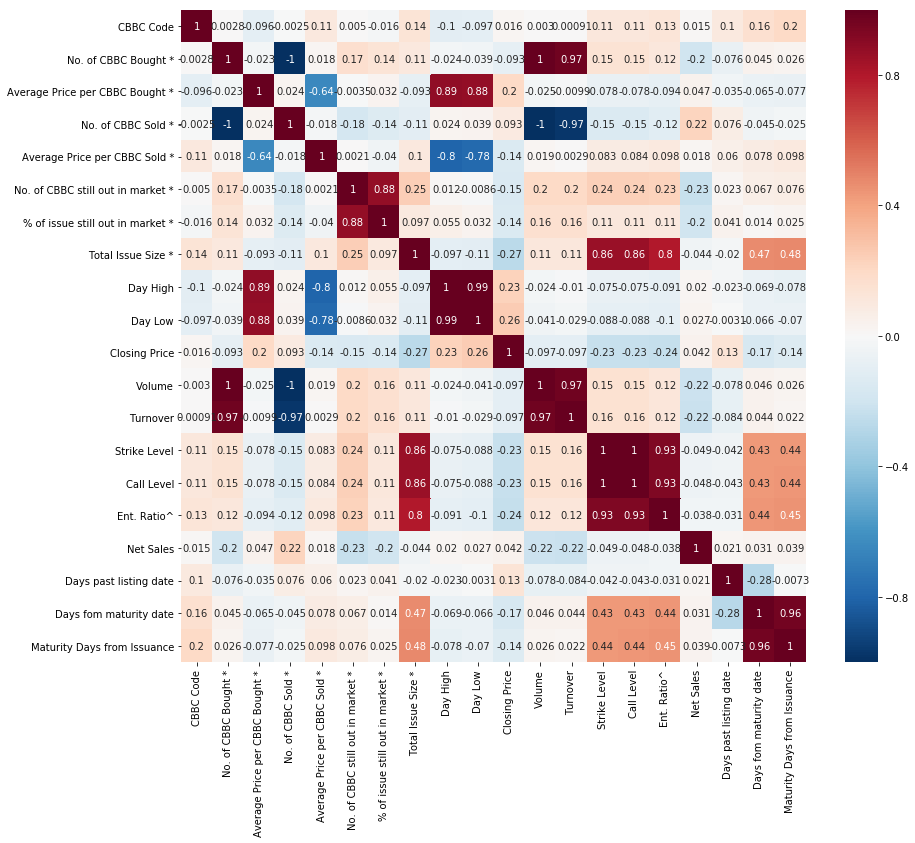

In [30]:
correlation = data.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [43]:
# transform data

# add net sales column
data['Net Sales'] = data.apply(lambda row: (row['No. of CBBC Bought *'] * row['Average Price per CBBC Bought *']) - (row['No. of CBBC Sold *'] * row['Average Price per CBBC Sold *']), axis = 1)

#add the days left from the maturity date and the days past the listing date columns
data['Days past listing date'] = (data['Trade Date'] - data['Listing Date']).dt.days
data['Days fom maturity date'] = (data['Maturity Date'] - data['Trade Date']).dt.days
data['Maturity Days from Issuance'] = (data['Maturity Date'] - data['Listing Date']).dt.days


# Display the first five records
display(data.head(n=5))


,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Trading Currency,Day High,Day Low,Closing Price,Volume,Turnover,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**,Net Sales,Days past listing date,Days fom maturity date,Maturity Days from Issuance
0,57003,UB#HSI RC2010B,2019-01-31,380000,0.265,-80000,-0.275,2290000,1.15,200000000,HKD,0.265,0.265,0.270,460000,122700,UB,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,24038.0,24138.0,12000,-,78700.0,86,637,723
1,57014,UB#TENCTRC1903U,2019-01-31,0,0.000,0,0.000,10000,0.03,40000000,HKD,0.000,0.000,0.920,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,0.0,86,42,128
2,57015,JP#TENCTRC1902A,2019-01-31,0,0.000,0,0.000,1000,0.00,50000000,HKD,0.000,0.000,0.960,0,0,JP,700,Bull,Standard,R,2018-11-06,2019-02-14 00:00:00,2019-02-15,N,HKD,252.4,255.2,100,2019-02-18 00:00:00,0.0,86,15,101
3,57016,JP#HSI RC2009V,2019-01-31,150000,0.290,0,0.000,100000,0.05,200000000,HKD,0.295,0.280,0.295,150000,43500,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-09-29,N,-,24458.0,24558.0,10000,-,43500.0,86,607,693
4,57017,JP#HSI RC2010E,2019-01-31,0,0.000,0,0.000,3290000,1.65,200000000,HKD,0.000,0.000,0.390,0,0,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,23358.0,23458.0,10000,-,0.0,86,637,723


In [45]:
# Remove redundant columns
refinedData = data.drop(columns=['CBBC Name', 'No. of CBBC Bought *', 'Average Price per CBBC Bought *', 'No. of CBBC Sold *', 'Average Price per CBBC Sold *', 'No. of CBBC still out in market *', '% of issue still out in market *', 'Trading Currency', 'Day High', 'Day Low', 'Closing Price', 'Volume', 'Turnover', 'Listing Date', 'Last Trading Date', 'Maturity Date', 'Strike/Call Currency', 'Delisting Date**'])

# Display the first five records
display(refinedData.head(n=5))


,CBBC Code,Trade Date,Total Issue Size *,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,MCE,Strike Level,Call Level,Ent. Ratio^,Net Sales,Days past listing date,Days fom maturity date,Maturity Days from Issuance
0,57003,2019-01-31,200000000,UB,HSI,Bull,Standard,R,N,24038.0,24138.0,12000,78700.0,86,637,723
1,57014,2019-01-31,40000000,UB,700,Bull,Standard,R,N,255.4,257.9,100,0.0,86,42,128
2,57015,2019-01-31,50000000,JP,700,Bull,Standard,R,N,252.4,255.2,100,0.0,86,15,101
3,57016,2019-01-31,200000000,JP,HSI,Bull,Standard,R,N,24458.0,24558.0,10000,43500.0,86,607,693
4,57017,2019-01-31,200000000,JP,HSI,Bull,Standard,R,N,23358.0,23458.0,10000,0.0,86,637,723


In [84]:
# group by cbbc code
cbbcGrouped = refinedData.groupby(
   ['CBBC Code']
).agg(
    {
        'Net Sales': sum,    # Sum per group
        'Total Issue Size *': 'first',
        'Issuer': 'first',
        'Underlying': 'first',
        'Bull/Bear': 'first',
        'CBBC Type': 'first',
        'CBBC Category': 'first',
        'MCE': 'first',
        'Strike Level': 'first',
        'Call Level': 'first',
        'Ent. Ratio^': 'first',
        'Net Sales': 'first',
        'Maturity Days from Issuance': 'first',
        'Days past listing date': min,  # get the count of networks
        'Days fom maturity date': min  # get the first date per group
    }
)

display(cbbcGrouped.head())

,Maturity Days from Issuance,Days past listing date,Ent. Ratio^,Call Level,Total Issue Size *,Net Sales,Days fom maturity date,Strike Level,MCE,CBBC Category,Bull/Bear,Underlying,CBBC Type,Issuer
CBBC Code,,,,,,,,,,,,,,
57003,723,57,12000,24138.0,200000000,78700.0,637,24038.0,N,R,Bull,HSI,Standard,UB
57014,128,57,100,257.9,40000000,0.0,42,255.4,N,R,Bull,700,Standard,UB
57015,101,57,100,255.2,50000000,0.0,15,252.4,N,R,Bull,700,Standard,JP
57016,693,57,10000,24558.0,200000000,43500.0,607,24458.0,N,R,Bull,HSI,Standard,JP
57017,723,57,10000,23458.0,200000000,0.0,637,23358.0,N,R,Bull,HSI,Standard,JP


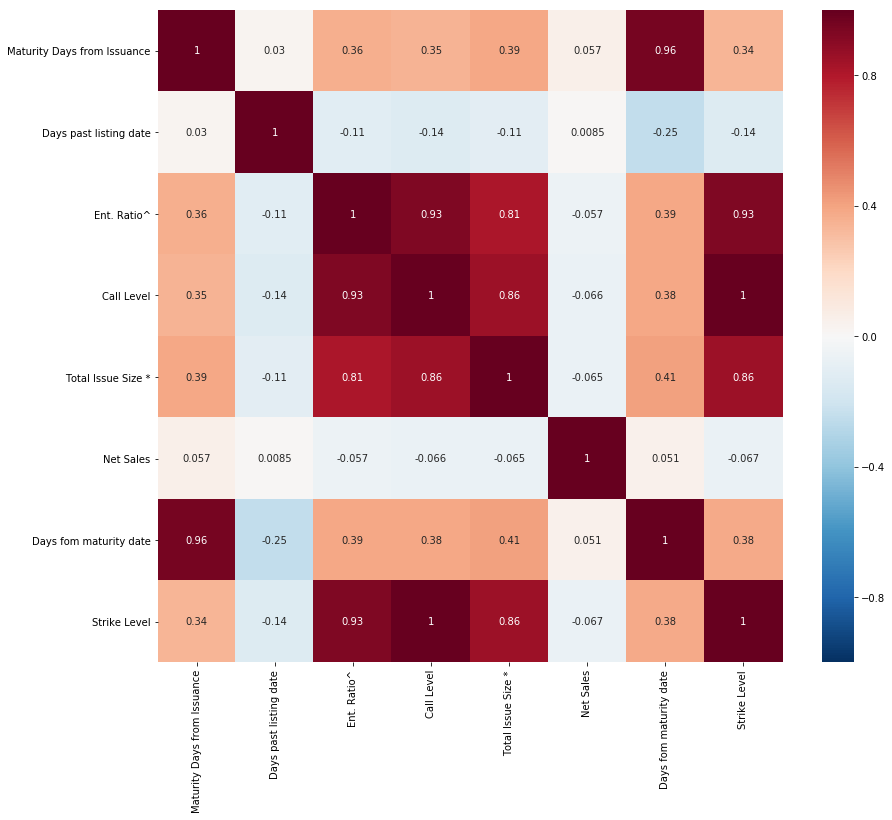

In [85]:
correlation = cbbcGrouped.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# from the below heat map, the net sales is not corelated to any of the parameters

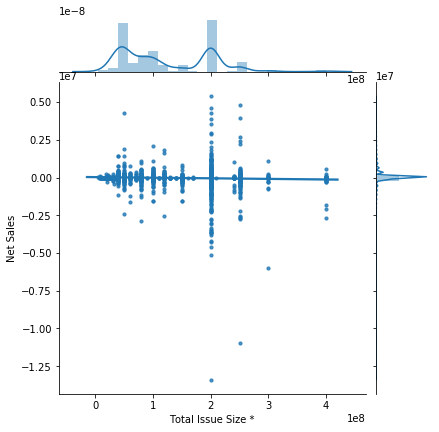

In [90]:
# Net Sales vs Total Issue Size
salesVsIssue = cbbcGrouped[['Total Issue Size *', 'Net Sales']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Total Issue Size *", y="Net Sales", data=salesVsIssue)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

# From below graph, the conclusion is issue size of (2) or (2.5) or (0.5 to 1) lead to better sales

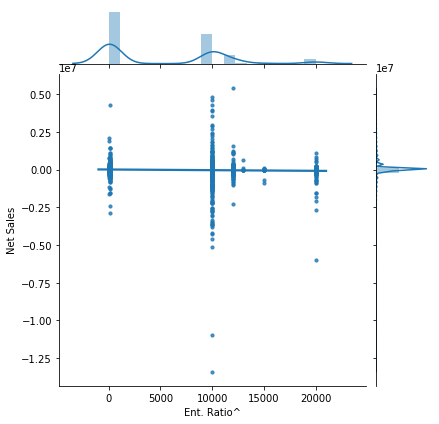

In [91]:
# Net Sales vs Ent. Ratio^
salesVsRatio = cbbcGrouped[['Ent. Ratio^', 'Net Sales']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Ent. Ratio^", y="Net Sales", data=salesVsRatio, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

# From below graph, the conclusion is Ent. Ratio of (10000) or (close to 100) lead to better sales

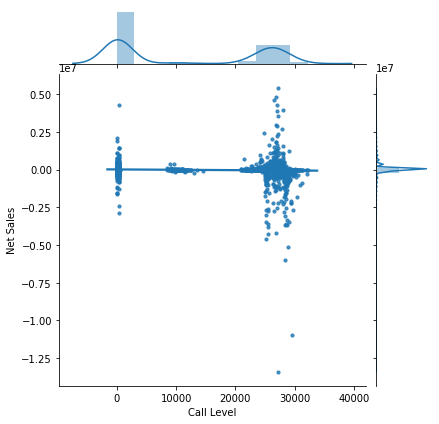

In [92]:
# Net Sales vs Call Level
salesVsCallLevel = cbbcGrouped[['Call Level', 'Net Sales']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Call Level", y="Net Sales", data=salesVsCallLevel, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

# From below graph, the conclusion is Call Level of (close to 1000) or (25000 to 30000) lead to better sales